<a href="https://colab.research.google.com/github/abhinav2428/Pygame-music-genre-classifier/blob/main/KDAGTASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Music Genre Analysis - Implementation

# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import files
uploaded = files.upload()

Saving TASK2_dataset.csv to TASK2_dataset.csv


In [6]:
# Load Dataset
#data = pd.read_csv('C:\\Users\\Admin\\Downloads\\TASK2_dataset.csv')
import io
data = pd.read_csv(io.BytesIO(uploaded['TASK2_dataset.csv']))
# Step 1: Preliminary Exploration
data.head(), data.info(), print(data['genre'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   song_id    147 non-null    int64 
 1   keyword_1  147 non-null    object
 2   keyword_2  147 non-null    object
 3   keyword_3  147 non-null    object
 4   genre      147 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.9+ KB
genre
pop          31
rock         30
hip-hop      30
country      29
classical    27
Name: count, dtype: int64


(   song_id keyword_1  keyword_2  keyword_3      genre
 0       74    guitar      happy  distorted       rock
 1      103     brass  energetic    melodic  classical
 2      201     banjo      happy   acoustic    country
 3      194     synth  energetic      heavy    hip-hop
 4      184     synth  energetic       slow    hip-hop,
 None,
 None)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-8-f30a8e85446c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


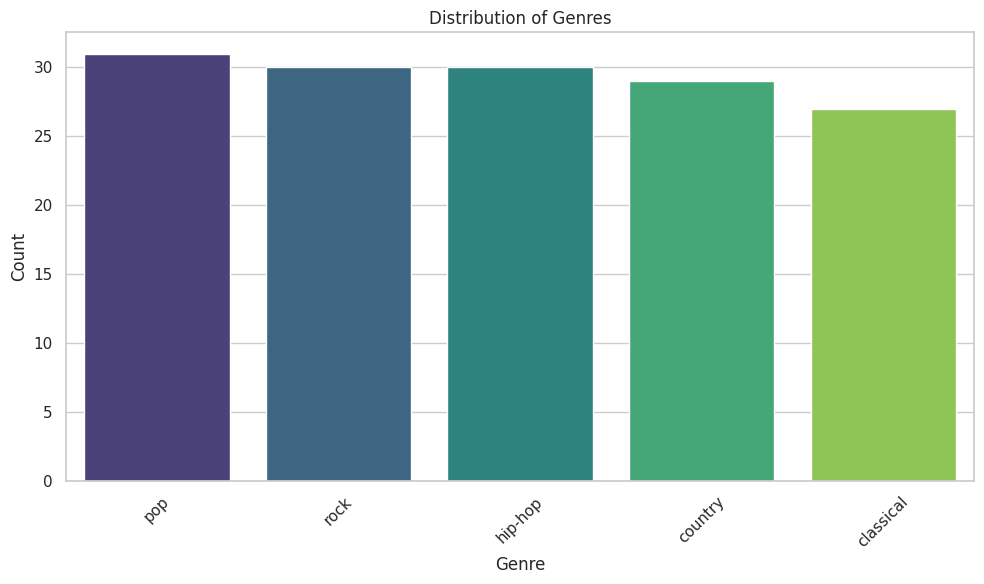

In [8]:
sns.set(style="whitegrid")

# 1. Distribution of Genres
plt.figure(figsize=(10, 6))
genre_counts = data['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-9-87ba5ef269c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword1_counts.values, y=keyword1_counts.index, palette="plasma", ax=axes[0])
<ipython-input-9-87ba5ef269c9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword2_counts.values, y=keyword2_counts.index, palette="plasma", ax=axes[1])
<ipython-input-9-87ba5ef269c9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword3_counts.values, y=keyword3_counts.index, palette="plasma", ax=axes[2])


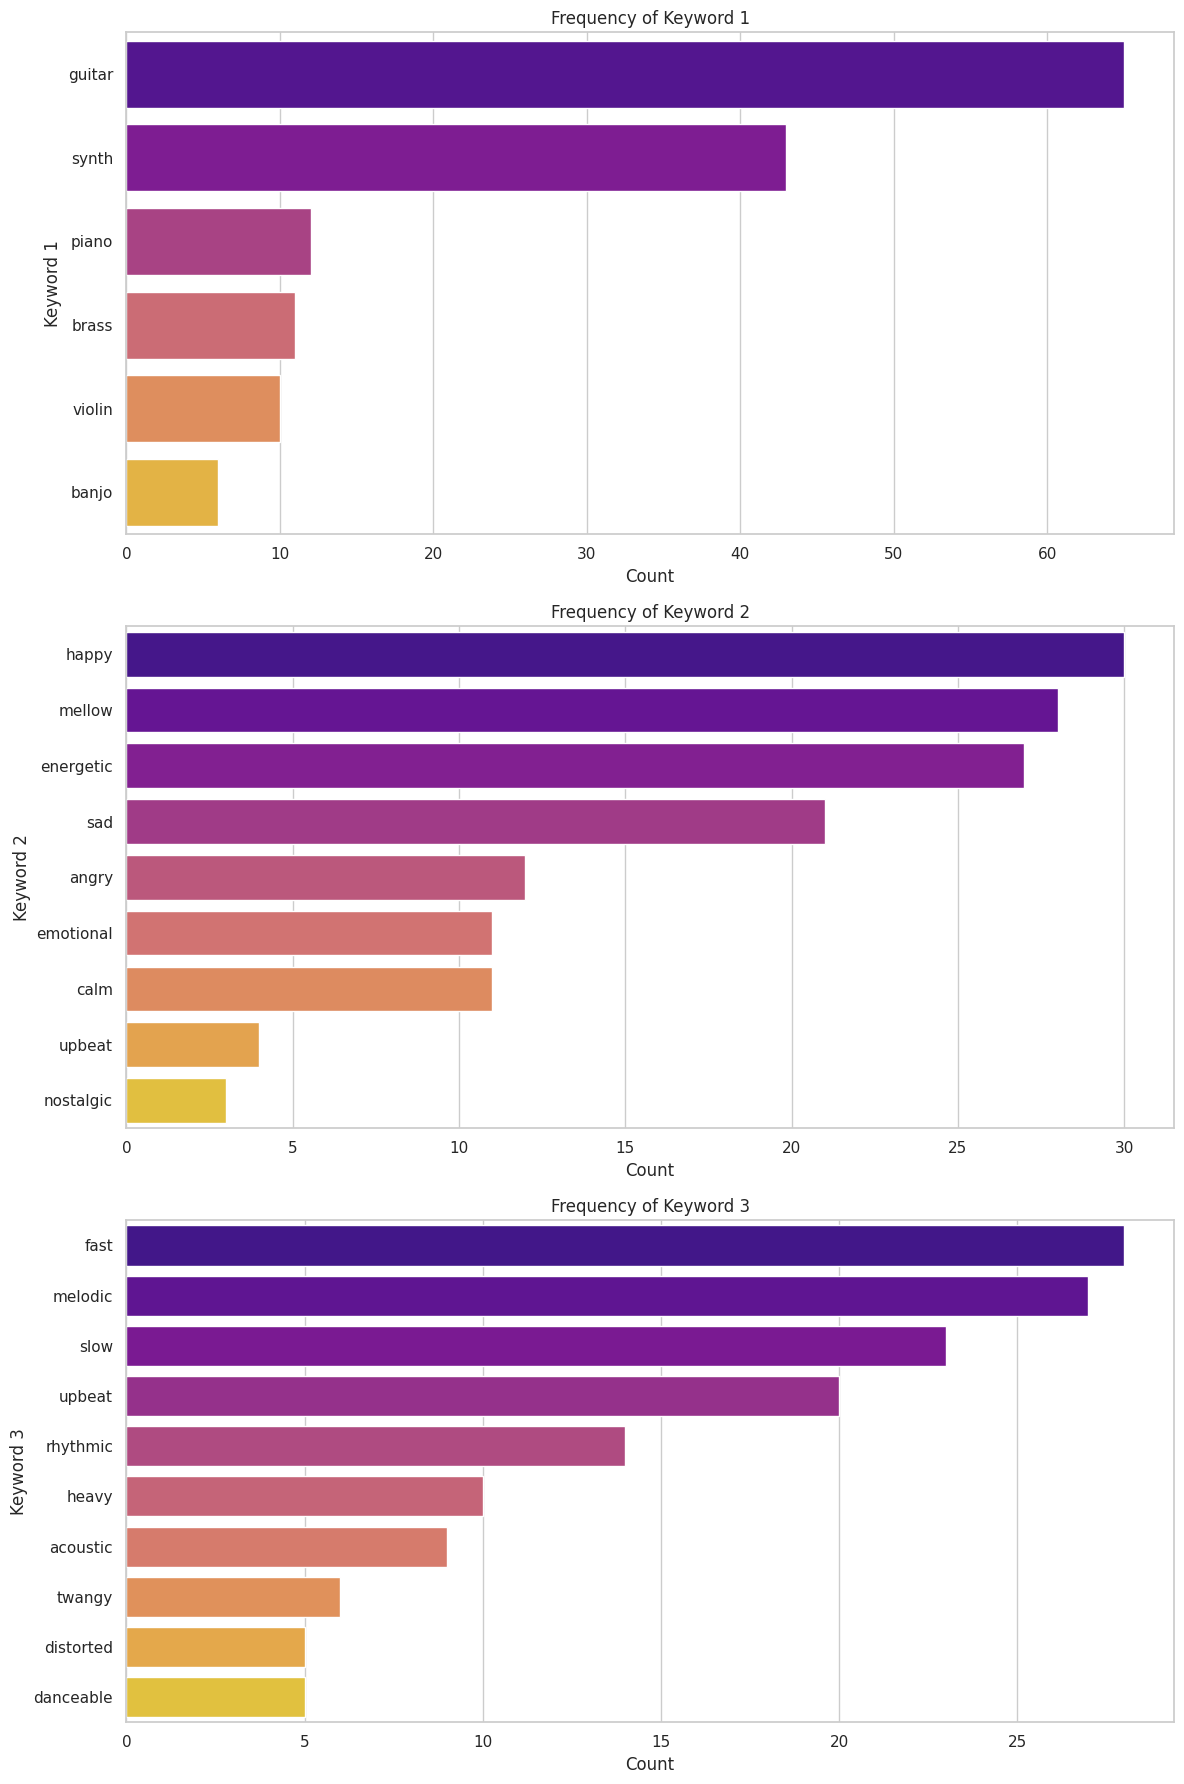

In [9]:
# 2. Frequency of Each Keyword
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for keyword_1
keyword1_counts = data['keyword_1'].value_counts()
sns.barplot(x=keyword1_counts.values, y=keyword1_counts.index, palette="plasma", ax=axes[0])
axes[0].set_title('Frequency of Keyword 1')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Keyword 1')

# Plot for keyword_2
keyword2_counts = data['keyword_2'].value_counts()
sns.barplot(x=keyword2_counts.values, y=keyword2_counts.index, palette="plasma", ax=axes[1])
axes[1].set_title('Frequency of Keyword 2')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Keyword 2')

# Plot for keyword_3
keyword3_counts = data['keyword_3'].value_counts()
sns.barplot(x=keyword3_counts.values, y=keyword3_counts.index, palette="plasma", ax=axes[2])
axes[2].set_title('Frequency of Keyword 3')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Keyword 3')

plt.tight_layout()
plt.show()

<ipython-input-10-83392a2cef8b>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

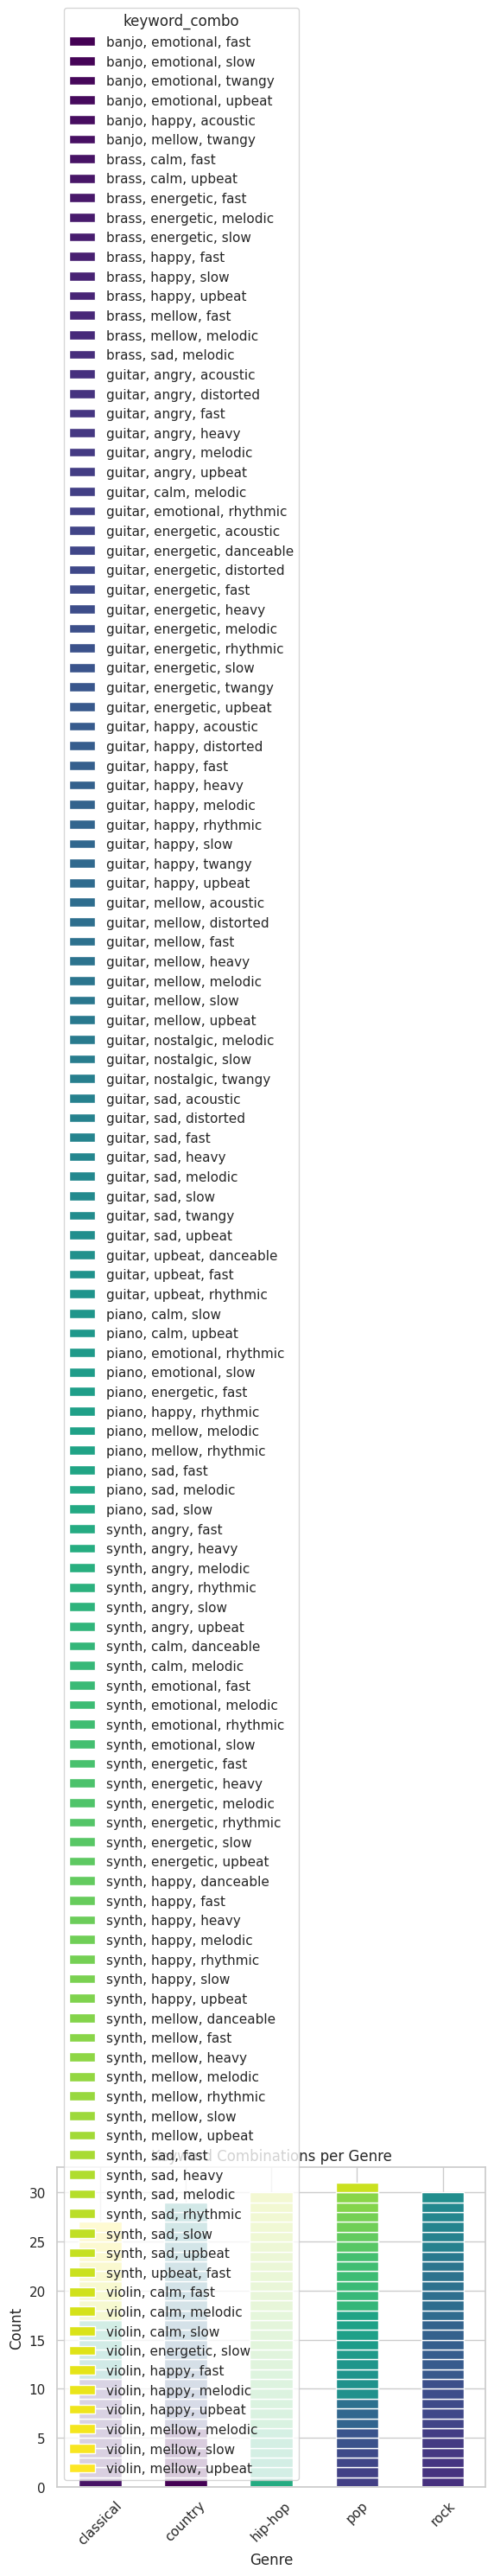

In [10]:
# 3. Keyword Combinations per Genre - Stacked Bar Chart

# Create a new column that concatenates the three keywords
data['keyword_combo'] = data['keyword_1'] + ", " + data['keyword_2'] + ", " + data['keyword_3']

# Create a pivot table to get the count of each keyword combination per genre
pivot_data = data.pivot_table(index='genre', columns='keyword_combo', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Keyword Combinations per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


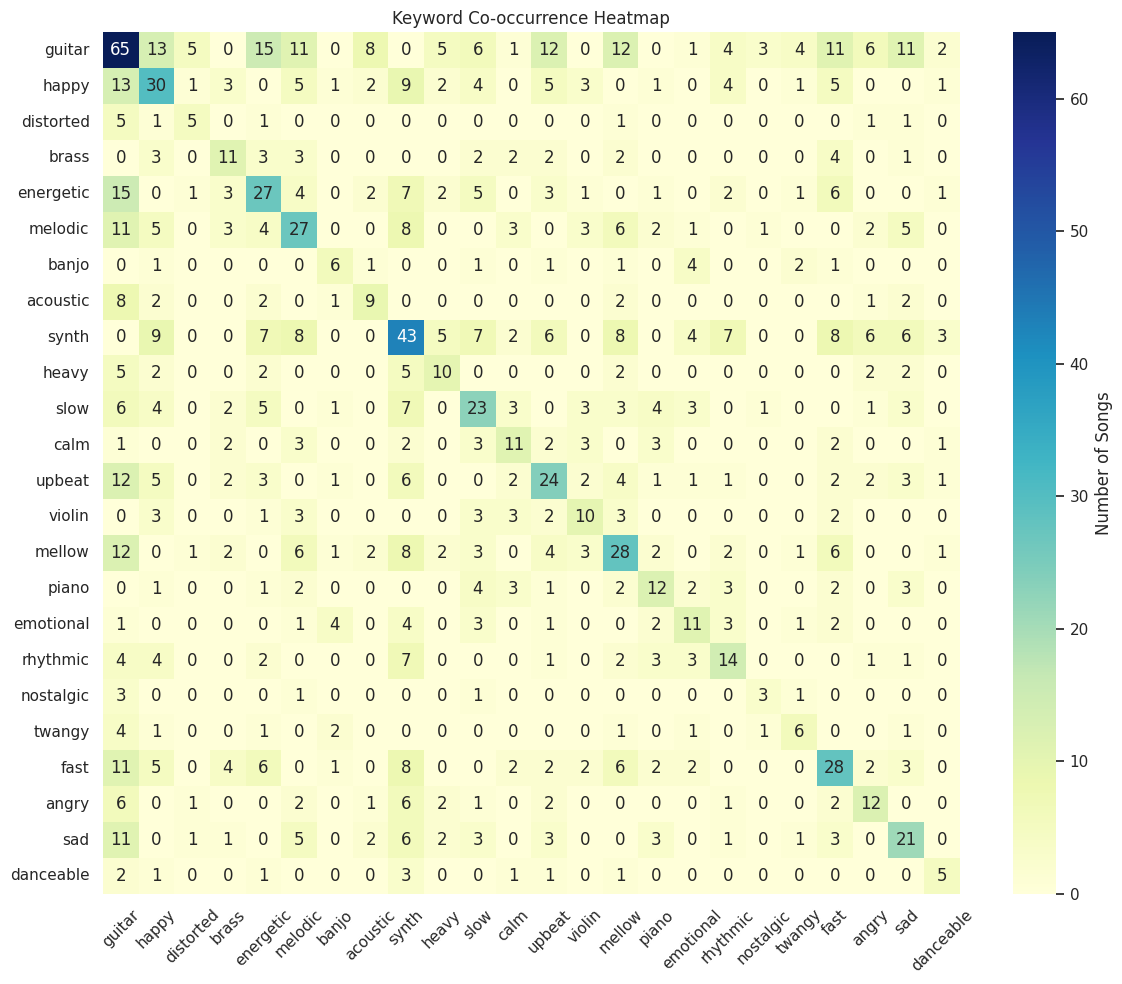

In [11]:
# 4. Improved Heatmap of Keyword Co-occurrences
# Build an incidence matrix for keyword presence per song
all_keywords = pd.unique(data[['keyword_1', 'keyword_2', 'keyword_3']].values.ravel())
incidence = pd.DataFrame(0, index=data.index, columns=all_keywords)
for idx, row in data.iterrows():
    for kw in ['keyword_1', 'keyword_2', 'keyword_3']:
        incidence.at[idx, row[kw]] = 1

# Compute co-occurrence matrix
co_occurrence = incidence.T.dot(incidence)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={'label': 'Number of Songs'})
plt.title('Keyword Co-occurrence Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **Vectorization**

In [12]:
keywords = np.unique(data[['keyword_1','keyword_2','keyword_3']].values.flatten())
genre = data.genre.unique()
count = len(data.genre)
key1 = data.keyword_1.unique()
key2 = data.keyword_2.unique()
key3 = data.keyword_3.unique()

## **BOW**

In [13]:
key_BOW_1 = np.zeros((count,len(key1)))
key_BOW_2 = np.zeros((count,len(key2)))
key_BOW_3 = np.zeros((count,len(key3)))


for i in range(count):
    for j in range(len(key1)):
        if key1[j] in data.keyword_1[i]:
            key_BOW_1[i][j] += 1

    for j in range(len(key2)):
        if key2[j] in data.keyword_2[i]:
            key_BOW_2[i][j] += 1

    for j in range(len(key3)):
        if key3[j] in data.keyword_3[i]:
            key_BOW_3[i][j] += 1


In [14]:
tf_1 = np.copy(key_BOW_1)/3
tf_2 = np.copy(key_BOW_2)/3
tf_3 = np.copy(key_BOW_3)/3

idf_1 = np.zeros(len(key1))
idf_2 = np.zeros(len(key2))
idf_3 = np.zeros(len(key3))

for i in range(len(key1)):
    idf_1[i] = np.log((count+1)/sum(tf_1[:,i]+1))
for i in range(len(key2)):
    idf_2[i] = np.log((count+1)/sum(tf_2[:,i]+1))
for i in range(len(key3)):
    idf_3[i] = np.log((count+1)/sum(tf_3[:,i]+1))

tfidf_1 = tf_1 * idf_1
tfidf_2 = tf_2 * idf_2
tfidf_3 = tf_3 * idf_3

In [15]:
def pca(set):
    temp = set - np.mean(set)
    temp = temp / np.std(temp)

    temp = np.cov (temp.T)

    eigenval , eigenvect = np.linalg.eig(temp)

    indepcas = np.argsort(eigenval)[::-1]

    eigenvect = eigenvect[:,indepcas[0:2]]

    temp = set @ eigenvect

    return temp



pca_1_tf = pca(tfidf_1)
pca_2_tf = pca(tfidf_2)
pca_3_tf = pca(tfidf_3)

pcas_tf =  np.cbrt(pca_1_tf**5 + pca_2_tf**5 + pca_3_tf**5)



pca_1_bow = pca(key_BOW_1)
pca_2_bow = pca(key_BOW_2)
pca_3_bow = pca(key_BOW_3)

pcas_bow = np.cbrt(pca_1_bow**5 + pca_2_bow**5 + pca_3_bow**5)




In [16]:
cents = 5
def kmeans(pcas):

    np.random.seed(100)
    centroids = pcas[np.random.choice(range(len(pcas)),cents , replace=False)]

    for i in range(100):
        distances = np.linalg.norm(pcas[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([pcas[labels == j].mean(axis=0) for j in range(cents)])

        centroids = new_centroids
    return centroids,labels


centroids_tf, labels_tf = kmeans(pcas_tf)
centroids_bow, labels_bow = kmeans(pcas_bow)


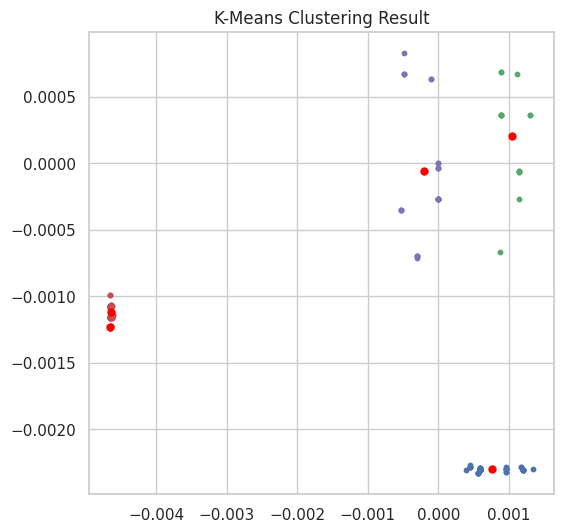

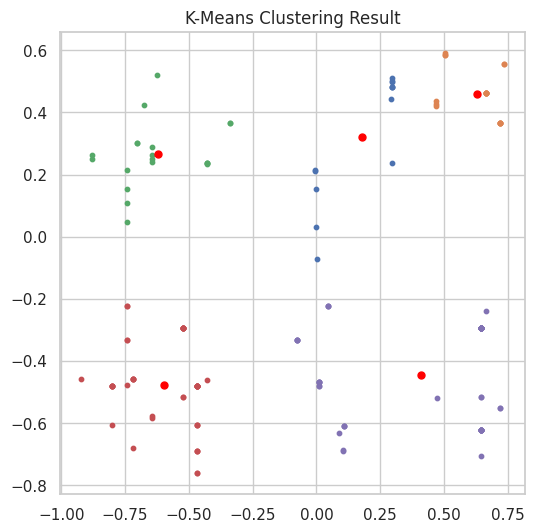

In [17]:
def plot(pcas,centroids, labels,cents):

    plt.figure(figsize=(6,6))
    for i in range(cents):
        plt.scatter(pcas[labels == i][:, 0], pcas[labels == i][:, 1],s=10 )
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', color='red', s=100, label="Centroids")
    plt.title("K-Means Clustering Result")
    plt.show()

plot(pcas_tf , centroids_tf , labels_tf , cents)
plot(pcas_bow , centroids_bow , labels_bow , cents)

In [18]:
def silhouette_score(pcas,labels):
    n = pcas.shape[0]
    unique_clusters = np.unique(labels)

    a_values = np.zeros(n)

    for i in range(n):
        own_cluster = labels[i]
        own_cluster_points = pcas[labels == own_cluster]

        if len(own_cluster_points) > 1:
           distances = [np.linalg.norm(pcas[i] - p) for p in own_cluster_points if not np.array_equal(pcas[i], p)]
           a_values[i] = np.mean(distances)
        else:
            a_values[i] = 0

    b_values = np.zeros(n)

    for i in range(n):
        own_cluster = labels[i]
        min_cluster_distance = float('inf')

        for cluster in unique_clusters:
            if cluster == own_cluster:
                continue

            other_cluster_points = pcas[labels == cluster]
            mean_distance = np.mean([np.linalg.norm(pcas[i] - p) for p in other_cluster_points])
            min_cluster_distance = min(min_cluster_distance, float(mean_distance))

        b_values[i] = min_cluster_distance


    silhouette_scores = np.zeros(n)

    for i in range(n):
        silhouette_scores[i] = (b_values[i] - a_values[i]) / max(a_values[i], b_values[i])

    silhouette_score = np.mean(silhouette_scores)

    print("Silhouette Score:", silhouette_score)


silhouette_score(pcas_tf,labels_tf)
silhouette_score(pcas_bow,labels_bow)

Silhouette Score: 0.6629032524896323
Silhouette Score: 0.554331127729458


In [19]:
def predict_genre_withgenre(keyword1, keyword2, keyword3, musics, genre):
    key_rep = np.zeros((3,len(genre)))
    for j in range(len(genre)):
        for k in range(len(musics.genre)):
            if genre[j] == musics.genre[k]:
                if keyword1 == musics.keyword_1[k]:
                    key_rep[0][j] += 1
                if keyword2 == musics.keyword_2[k]:
                    key_rep[1][j] += 1
                if keyword3 == musics.keyword_3[k]:
                    key_rep[2][j] += 1


    key_mult = (key_rep[0]+1)*(key_rep[1]+1)* (key_rep[2]+1)
    return genre[(np.argsort(key_mult)[::-1])[0]]


k10 ,k20, k30 = "piano", "calm", "slow"
print(f"{k10} , {k20} , {k30} -> ",predict_genre_withgenre(k10, k20, k30,data, genre))

ans=0
for k in range(len(data.genre)):
    if data.genre[k] == predict_genre_withgenre(data.keyword_1[k], data.keyword_2[k] , data.keyword_3[k], data, genre):
        ans +=1
print("Acurracy = ",ans/len(labels_tf))

piano , calm , slow ->  classical
Acurracy =  0.8367346938775511
